In [1]:
import pandas as pd

# Especifica la ruta del archivo CSV
file_path = 'D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv'

# Cargar el CSV en un DataFrame
df_mora_prestamos = pd.read_csv(file_path)

In [5]:
import pandas as pd

# Supongamos que df_mora_prestamos es tu DataFrame
# Si no has cargado el DataFrame, puedes hacerlo de la siguiente manera:
# df_mora_prestamos = pd.read_csv('tu_archivo.csv')

# Contar la cantidad de registros y variables
num_registros = df_mora_prestamos.shape[0]  # Número de filas
num_variables = df_mora_prestamos.shape[1]  # Número de columnas

# Imprimir los resultados
print(f"Cantidad de registros: {num_registros}")
print(f"Cantidad de variables: {num_variables}")

Cantidad de registros: 1626264
Cantidad de variables: 32


# GRADIENT BOOTING CLASSIFIER


Medidas de rendimiento para Sin Balanceo:
ROC-AUC: 0.9989
Precision: 0.9752
Recall: 0.9499
F1-Score: 0.9624
Accuracy: 0.9957

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9969  0.9985    0.9977  459735.0000
1                0.9752  0.9499    0.9624   28145.0000
accuracy         0.9957  0.9957    0.9957       0.9957
macro avg        0.9861  0.9742    0.9800  487880.0000
weighted avg     0.9957  0.9957    0.9957  487880.0000


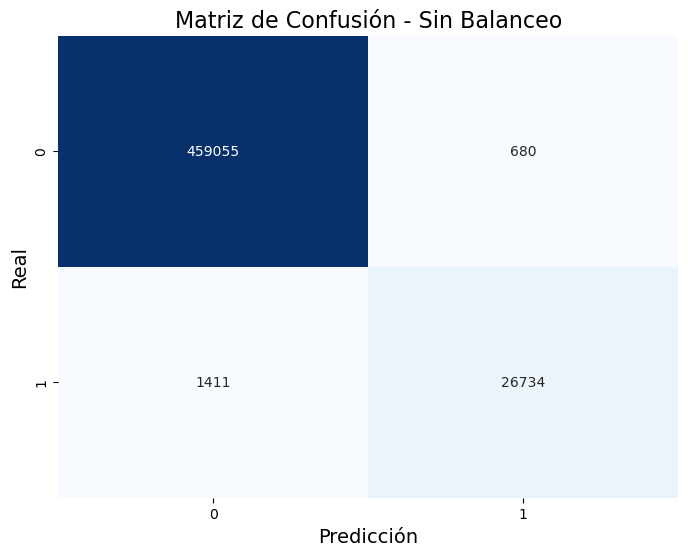

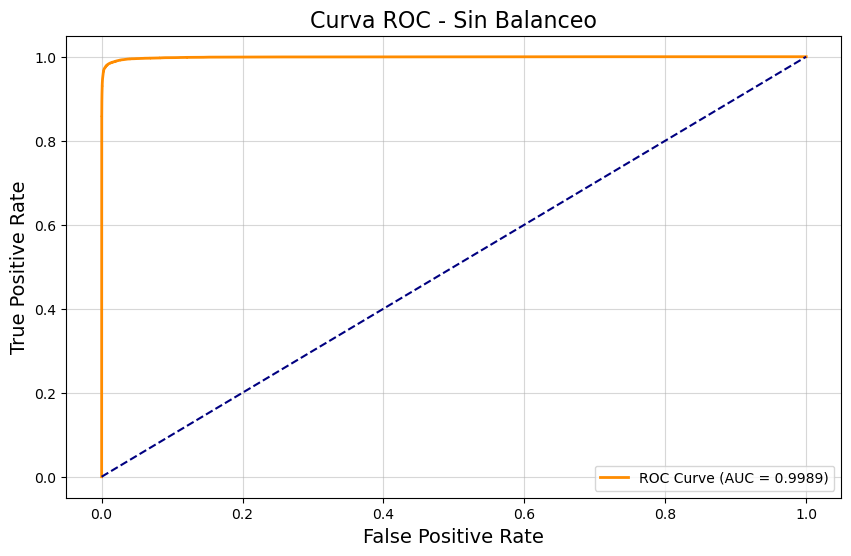


Medidas de rendimiento para SMOTE:
ROC-AUC: 0.9988
Precision: 0.8905
Recall: 0.9746
F1-Score: 0.9306
Accuracy: 0.9916

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9984  0.9927    0.9955  459735.0000
1                0.8905  0.9746    0.9306   28145.0000
accuracy         0.9916  0.9916    0.9916       0.9916
macro avg        0.9445  0.9836    0.9631  487880.0000
weighted avg     0.9922  0.9916    0.9918  487880.0000


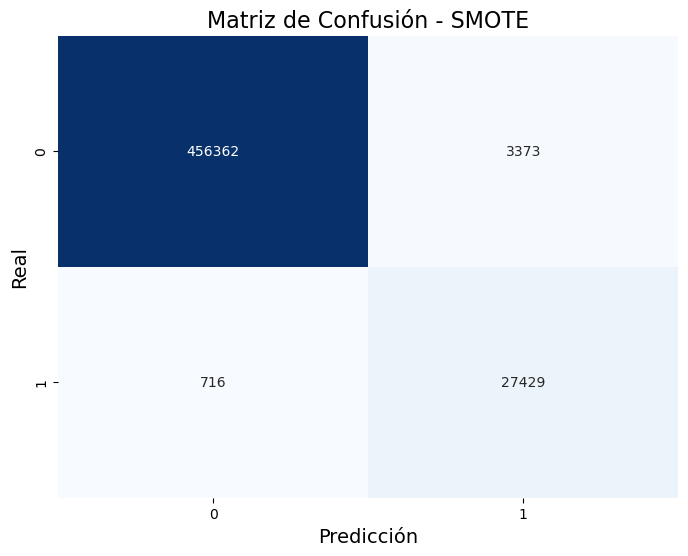

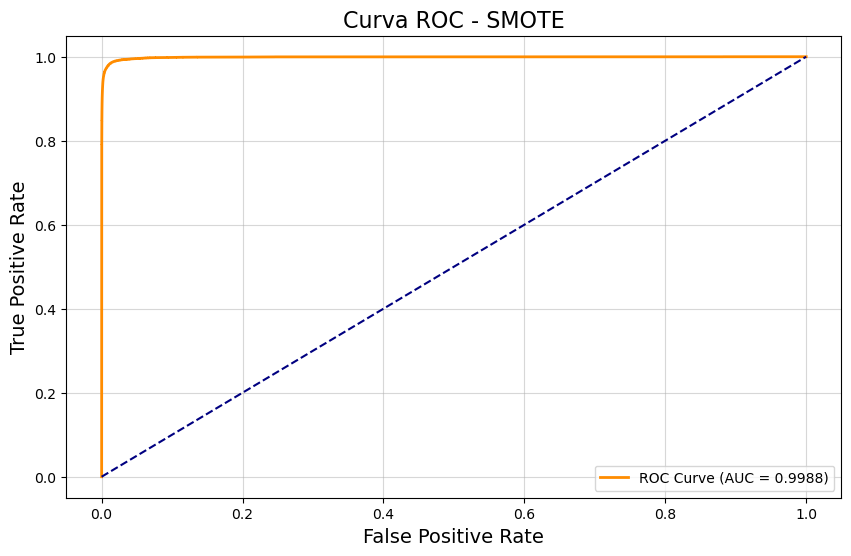


Medidas de rendimiento para SMOTE-Tomek:
ROC-AUC: 0.9988
Precision: 0.8947
Recall: 0.9746
F1-Score: 0.9330
Accuracy: 0.9919

Reporte de Clasificación:
              precision  recall  f1-score      support
0                0.9984  0.9930    0.9957  459735.0000
1                0.8947  0.9746    0.9330   28145.0000
accuracy         0.9919  0.9919    0.9919       0.9919
macro avg        0.9466  0.9838    0.9643  487880.0000
weighted avg     0.9925  0.9919    0.9921  487880.0000


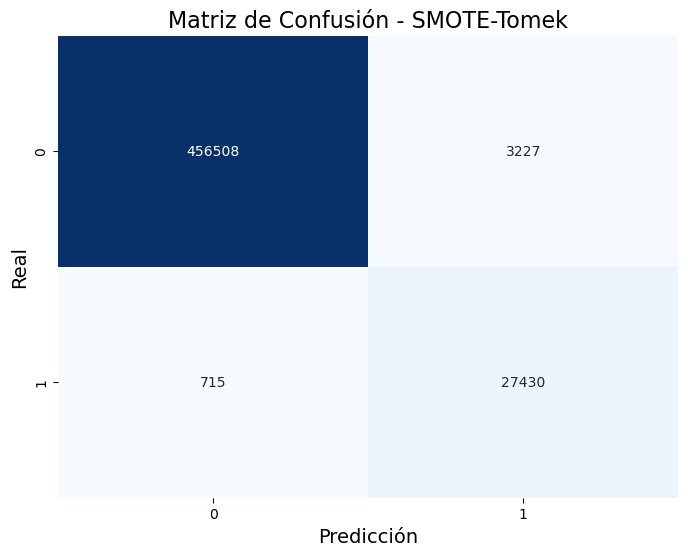

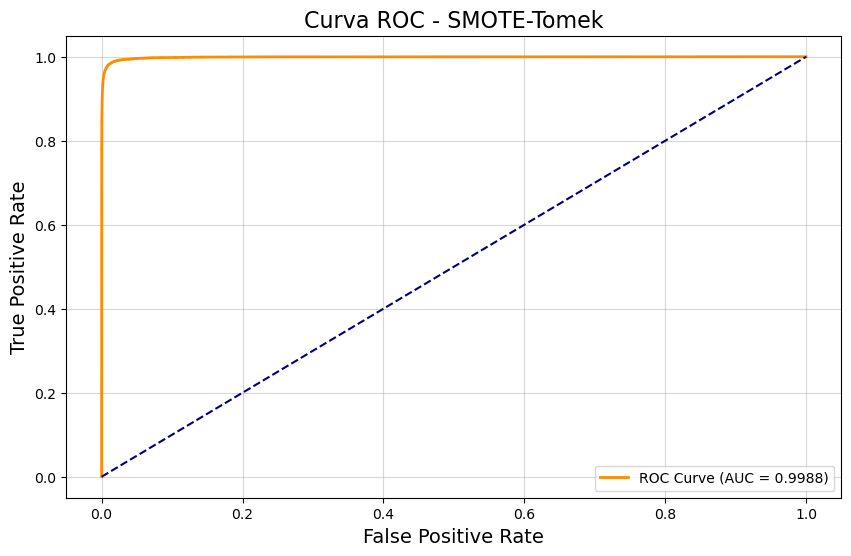


Comparativa de Técnicas de Balanceo:
               roc_auc  precision    recall        f1  accuracy
Sin Balanceo  0.998890   0.975195  0.949867  0.962364  0.995714
SMOTE         0.998813   0.890494  0.974560  0.930633  0.991619
SMOTE-Tomek   0.998817   0.894739  0.974596  0.932961  0.991920


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
   classification_report, 
   confusion_matrix, 
   roc_curve, 
   auc,
   f1_score, 
   accuracy_score, 
   precision_score, 
   recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Configuraciones de semilla 
np.random.seed(42)

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
   X, y, test_size=0.3, stratify=y, random_state=42
)

# Función para evaluar modelo
def evaluar_modelo(X_train_balanceado, y_train_balanceado, X_test, y_test, nombre_tecnica):
   # Entrenar Gradient Boosting
   model = GradientBoostingClassifier(
       n_estimators=100,
       learning_rate=0.1,
       max_depth=3,
       min_samples_split=2,
       min_samples_leaf=1,
       subsample=0.8,
       random_state=42
   )
   
   model.fit(X_train_balanceado, y_train_balanceado)
   
   # Predicciones
   y_pred = model.predict(X_test)
   y_pred_proba = model.predict_proba(X_test)[:, 1]
   
   # Calcular métricas
   roc_auc = auc(*roc_curve(y_test, y_pred_proba)[:2])
   recall = recall_score(y_test, y_pred)
   precision = precision_score(y_test, y_pred)
   f1 = f1_score(y_test, y_pred)
   accuracy = accuracy_score(y_test, y_pred)
   
   print(f"\nMedidas de rendimiento para {nombre_tecnica}:")
   print(f"ROC-AUC: {roc_auc:.4f}")
   print(f"Precision: {precision:.4f}")
   print(f"Recall: {recall:.4f}")
   print(f"F1-Score: {f1:.4f}")
   print(f"Accuracy: {accuracy:.4f}")
   
   # Reporte de Clasificación
   print("\nReporte de Clasificación:")
   reporte = classification_report(y_test, y_pred, output_dict=True)
   reporte_redondeado = pd.DataFrame(reporte).transpose().round(4)
   print(reporte_redondeado)
   
   # Matriz de Confusión
   cm = confusion_matrix(y_test, y_pred)
   plt.figure(figsize=(8, 6))
   sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
   plt.title(f"Matriz de Confusión - {nombre_tecnica}", fontsize=16)
   plt.xlabel("Predicción", fontsize=14)
   plt.ylabel("Real", fontsize=14)
   plt.show()
   
   # Curva ROC
   fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
   plt.figure(figsize=(10, 6))
   plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.4f})", color="darkorange", lw=2)
   plt.plot([0, 1], [0, 1], color="navy", linestyle="--")
   plt.xlabel("False Positive Rate", fontsize=14)
   plt.ylabel("True Positive Rate", fontsize=14)
   plt.title(f"Curva ROC - {nombre_tecnica}", fontsize=16)
   plt.legend(loc="lower right")
   plt.grid(alpha=0.5)
   plt.show()
   
   return {
       'roc_auc': roc_auc,
       'precision': precision,
       'recall': recall,
       'f1': f1,
       'accuracy': accuracy
   }

# 1. Sin balanceo
resultados_sin_balanceo = evaluar_modelo(X_train, y_train, X_test, y_test, 'Sin Balanceo')

# 2. Con SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
resultados_smote = evaluar_modelo(X_train_smote, y_train_smote, X_test, y_test, 'SMOTE')

# 3. Con SMOTE-Tomek
smote_tomek = SMOTETomek(random_state=42)
X_train_smote_tomek, y_train_smote_tomek = smote_tomek.fit_resample(X_train, y_train)
resultados_smote_tomek = evaluar_modelo(X_train_smote_tomek, y_train_smote_tomek, X_test, y_test, 'SMOTE-Tomek')

# Comparativa de resultados
comparativa = pd.DataFrame([
   resultados_sin_balanceo,
   resultados_smote,
   resultados_smote_tomek
], index=['Sin Balanceo', 'SMOTE', 'SMOTE-Tomek'])

print("\nComparativa de Técnicas de Balanceo:")
print(comparativa)

# Guardar resultados
styled_df = comparativa.style.format('{:.4f}')
styled_df.to_html('D:/Tesis/Definitivos/nuevo/resultados_gradient_boosting_Final.html')
comparativa.to_csv('D:/Tesis/Definitivos/nuevo/resultados_gradient_boosting_Final.csv')

LOS MEJORES HIPERPARAMETROS

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Definir el espacio de búsqueda de hiperparámetros
param_distributions = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': [0.01, 0.05, 0.1, 0.15],
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None],
}

# Configurar el modelo base
model = GradientBoostingClassifier(random_state=100)

# Configurar la búsqueda aleatoria
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_distributions,
    n_iter=50,
    scoring='roc_auc',
    cv=5,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Realizar la búsqueda
print("Iniciando búsqueda de hiperparámetros...")
random_search.fit(X_train, y_train)

# Imprimir los mejores parámetros y score
print("\nMejores parámetros encontrados:")
for param, value in random_search.best_params_.items():
    print(f"{param}: {value}")
print(f"\nMejor score (ROC-AUC): {random_search.best_score_:.4f}")

# Entrenar el modelo con los mejores parámetros
best_model = GradientBoostingClassifier(**random_search.best_params_, random_state=42)
best_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calcular métricas
print("\nMétricas en conjunto de prueba:")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")

# Guardar los mejores parámetros
pd.DataFrame([random_search.best_params_]).to_csv('D:/Tesis/Definitivos/nuevo/mejores_parametros_gbc.csv', index=False)

Iniciando búsqueda de hiperparámetros...
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Mejores parámetros encontrados:
subsample: 1.0
n_estimators: 700
min_samples_split: 5
min_samples_leaf: 4
max_features: sqrt
max_depth: 7
learning_rate: 0.05

Mejor score (ROC-AUC): 0.9996

Métricas en conjunto de prueba:
ROC-AUC: 0.9995
Precision: 0.9867
Recall: 0.9727
F1-Score: 0.9797
Accuracy: 0.9977


CROSS VALIDATION DE LOS MEJORES HIPERPARAMETROS

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score

# Cargar dataset
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar características y variable objetivo
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Mejores hiperparámetros encontrados
best_params = {
   'subsample': 1.0,
   'n_estimators': 700,
   'min_samples_split': 5,
   'min_samples_leaf': 4,
   'max_features': 'sqrt',
   'max_depth': 7,
   'learning_rate': 0.05,
   'random_state': 42
}

# Preparar KFold
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Listas para almacenar resultados
train_scores = []
val_scores = []

print(f"Iniciando validación cruzada con {n_splits} folds...")
print("Usando Gradient Boosting Classifier con los mejores hiperparámetros")

# Realizar validación cruzada
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
   print(f"\nFold {fold}/{n_splits}")
   
   # Dividir datos
   X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
   y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
   
   # Crear y entrenar modelo
   model = GradientBoostingClassifier(**best_params)
   model.fit(X_train, y_train)
   
   # Predicciones
   train_pred = model.predict(X_train)
   train_pred_proba = model.predict_proba(X_train)[:, 1]
   
   val_pred = model.predict(X_val)
   val_pred_proba = model.predict_proba(X_val)[:, 1]
   
   # Calcular métricas
   train_metrics = {
       'roc_auc': roc_auc_score(y_train, train_pred_proba),
       'precision': precision_score(y_train, train_pred),
       'recall': recall_score(y_train, train_pred),
       'f1': f1_score(y_train, train_pred),
       'accuracy': accuracy_score(y_train, train_pred)
   }
   
   val_metrics = {
       'roc_auc': roc_auc_score(y_val, val_pred_proba),
       'precision': precision_score(y_val, val_pred),
       'recall': recall_score(y_val, val_pred),
       'f1': f1_score(y_val, val_pred),
       'accuracy': accuracy_score(y_val, val_pred)
   }
   
   train_scores.append(train_metrics)
   val_scores.append(val_metrics)
   
   print("\nMétricas de entrenamiento:")
   for metric, value in train_metrics.items():
       print(f"{metric}: {value:.4f}")
   
   print("\nMétricas de validación:")
   for metric, value in val_metrics.items():
       print(f"{metric}: {value:.4f}")

# Calcular promedios y desviaciones estándar
train_means = pd.DataFrame(train_scores).mean()
train_stds = pd.DataFrame(train_scores).std()
val_means = pd.DataFrame(val_scores).mean()
val_stds = pd.DataFrame(val_scores).std()

# Crear DataFrame para el resumen
summary_data = {
   'Train Mean': train_means,
   'Train Std': train_stds,
   'Val Mean': val_means,
   'Val Std': val_stds,
   'Diff (Train-Val)': train_means - val_means
}

summary_df = pd.DataFrame(summary_data).round(4)

print("\nResumen de validación cruzada:")
print("="*80)
print(summary_df)

# Guardar resultados
summary_df.to_csv('gradient_boosting_cross_validation_results.csv')

# Evaluar overfitting
print("\nEvaluación de overfitting:")
print("="*80)
for metric in train_means.index:
   diff = train_means[metric] - val_means[metric]
   print(f"\n{metric}:")
   print(f"Diferencia Train-Val: {abs(diff):.4f}")
   if abs(diff) > 0.02:
       print("⚠️ Posible overfitting detectado")
   else:
       print("✓ No hay evidencia de overfitting")

# Imprimir resumen final
print("\nRESUMEN FINAL:")
print("="*80)
print("\nPromedios en datos de entrenamiento:")
for metric in train_means.index:
   print(f"{metric}: {train_means[metric]:.4f} ± {train_stds[metric]:.4f}")

print("\nPromedios en datos de validación:")
for metric in val_means.index:
   print(f"{metric}: {val_means[metric]:.4f} ± {val_stds[metric]:.4f}")

Iniciando validación cruzada con 5 folds...
Usando Gradient Boosting Classifier con los mejores hiperparámetros

Fold 1/5

Métricas de entrenamiento:
roc_auc: 0.9998
precision: 0.9962
recall: 0.9877
f1: 0.9920
accuracy: 0.9991

Métricas de validación:
roc_auc: 0.9995
precision: 0.9873
recall: 0.9761
f1: 0.9817
accuracy: 0.9979

Fold 2/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9970
recall: 0.9892
f1: 0.9931
accuracy: 0.9992

Métricas de validación:
roc_auc: 0.9995
precision: 0.9872
recall: 0.9743
f1: 0.9807
accuracy: 0.9978

Fold 3/5

Métricas de entrenamiento:
roc_auc: 1.0000
precision: 0.9970
recall: 0.9894
f1: 0.9932
accuracy: 0.9992

Métricas de validación:
roc_auc: 0.9995
precision: 0.9864
recall: 0.9711
f1: 0.9787
accuracy: 0.9975

Fold 4/5

Métricas de entrenamiento:
roc_auc: 0.9999
precision: 0.9967
recall: 0.9895
f1: 0.9931
accuracy: 0.9992

Métricas de validación:
roc_auc: 0.9996
precision: 0.9865
recall: 0.9727
f1: 0.9795
accuracy: 0.9977

Fold 5/5

Métricas 

PRUEBAS CON DATOS NUEVOS

Entrenando Gradient Boosting con los mejores hiperparámetros...

Comparación de Métricas entre Dataset Prueba (Original) y Dataset Real:
     Métrica  Dataset Prueba (Original)  Dataset Real  Desvío
0   Accuracy                     0.9977        0.9945  0.0032
1  Precision                     0.9867        0.9378  0.0489
2     Recall                     0.9727        0.9882  0.0155
3   F1-Score                     0.9797        0.9623  0.0174
4    ROC-AUC                     0.9995        0.9981  0.0014


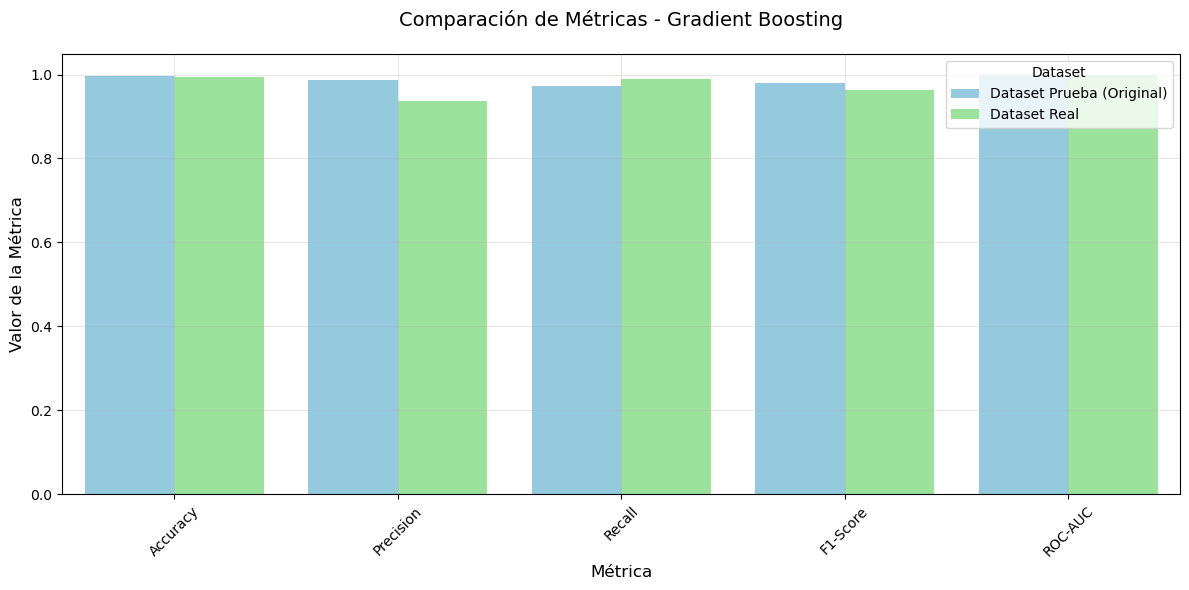

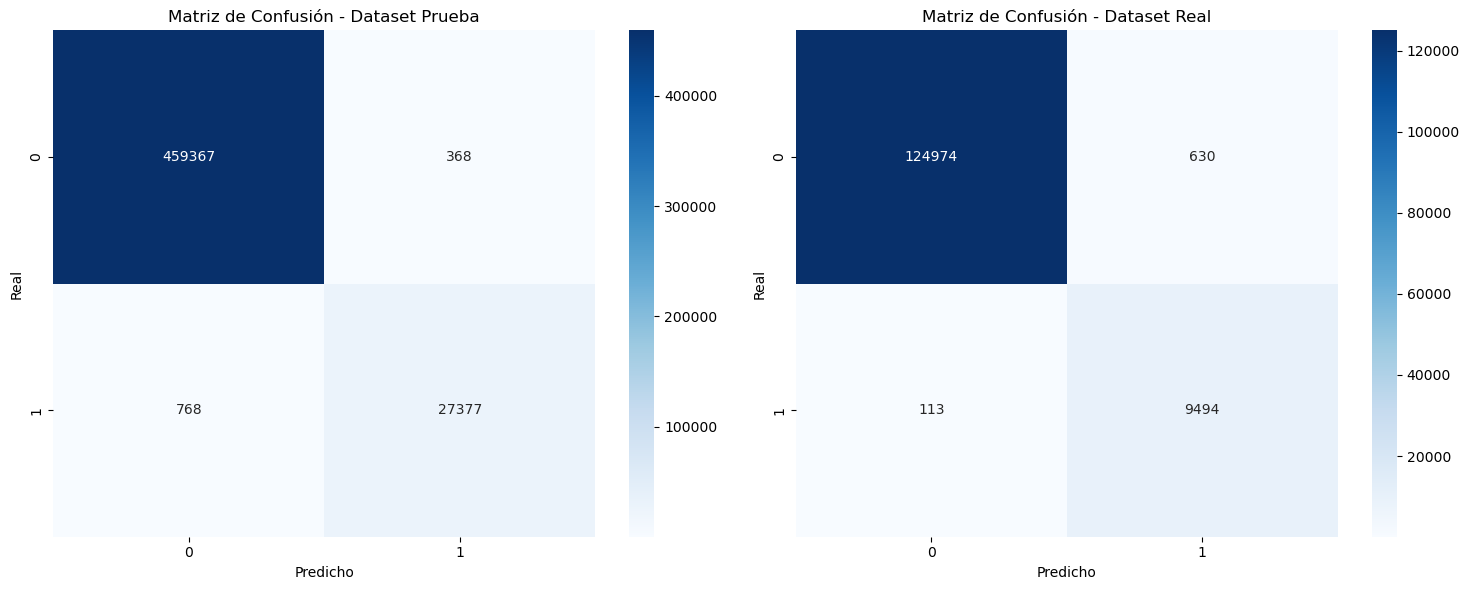

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
   classification_report,
   roc_auc_score,
   recall_score,
   f1_score,
   accuracy_score,
   precision_score,
   confusion_matrix,
   roc_curve
)
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# Función para calcular métricas
def calcular_metricas(modelo, X, y):
   y_pred = modelo.predict(X)
   y_pred_proba = modelo.predict_proba(X)[:, 1]
   
   roc_auc = roc_auc_score(y, y_pred_proba)
   recall = recall_score(y, y_pred)
   precision = precision_score(y, y_pred)
   f1 = f1_score(y, y_pred)
   accuracy = accuracy_score(y, y_pred)
   
   return {
       'Accuracy': round(accuracy, 4),
       'Precision': round(precision, 4),
       'Recall': round(recall, 4),
       'F1-Score': round(f1, 4),
       'ROC-AUC': round(roc_auc, 4)
   }

# Cargar datasets
df_mora_prestamos_original = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')
nuevo_dataset = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales_012024.csv')

# Separar características y variable objetivo
X_original = df_mora_prestamos_original.drop('Morosidad', axis=1)
y_original = df_mora_prestamos_original['Morosidad']
X_nuevo = nuevo_dataset.drop('Morosidad', axis=1)
y_nuevo = nuevo_dataset['Morosidad']

# Asegurar nombres consistentes
X_original.columns = X_original.columns.str.replace(' ', '_')
X_nuevo.columns = X_nuevo.columns.str.replace(' ', '_')

# Dividir datos del dataset original
X_train, X_test, y_train, y_test = train_test_split(
   X_original, y_original, test_size=0.3, stratify=y_original, random_state=42
)

# Entrenar modelo con los mejores hiperparámetros actualizados de Gradient Boosting
modelo = GradientBoostingClassifier(
   subsample=1.0,
   n_estimators=700,
   min_samples_split=5,
   min_samples_leaf=4,
   max_features='sqrt',
   max_depth=7,
   learning_rate=0.05,
   random_state=42
)

print("Entrenando Gradient Boosting con los mejores hiperparámetros...")
modelo.fit(X_train, y_train)

# Calcular métricas en conjunto de prueba original
metricas_test = calcular_metricas(modelo, X_test, y_test)

# Calcular métricas en nuevo dataset
metricas_nuevo = calcular_metricas(modelo, X_nuevo, y_nuevo)

# Comparar métricas
comparacion_metricas = pd.DataFrame({
   'Métrica': list(metricas_test.keys()),
   'Dataset Prueba (Original)': list(metricas_test.values()),
   'Dataset Real': list(metricas_nuevo.values()),
   'Desvío': [
       round(abs(metricas_test[m] - metricas_nuevo[m]), 4) for m in metricas_test
   ]
})

# Mostrar resultados
print("\nComparación de Métricas entre Dataset Prueba (Original) y Dataset Real:")
print(comparacion_metricas)

# Visualizar comparación
plt.figure(figsize=(12, 6))
sns.barplot(
   data=comparacion_metricas.melt(id_vars='Métrica', 
                                 value_vars=['Dataset Prueba (Original)', 'Dataset Real']),
   x='Métrica', 
   y='value', 
   hue='variable',
   palette=['skyblue', 'lightgreen']
)

plt.title("Comparación de Métricas - Gradient Boosting", fontsize=14, pad=20)
plt.ylabel("Valor de la Métrica", fontsize=12)
plt.xlabel("Métrica", fontsize=12)
plt.legend(title="Dataset", title_fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Matrices de confusión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Dataset de prueba
sns.heatmap(confusion_matrix(y_test, modelo.predict(X_test)), 
           annot=True, fmt='d', cmap='Blues', ax=ax1)
ax1.set_title('Matriz de Confusión - Dataset Prueba')
ax1.set_ylabel('Real')
ax1.set_xlabel('Predicho')

# Dataset nuevo
sns.heatmap(confusion_matrix(y_nuevo, modelo.predict(X_nuevo)), 
           annot=True, fmt='d', cmap='Blues', ax=ax2)
ax2.set_title('Matriz de Confusión - Dataset Real')
ax2.set_ylabel('Real')
ax2.set_xlabel('Predicho')

plt.tight_layout()
plt.show()

# Guardar resultados
comparacion_metricas.to_csv('resultados_gradient_boosting.csv', index=False)

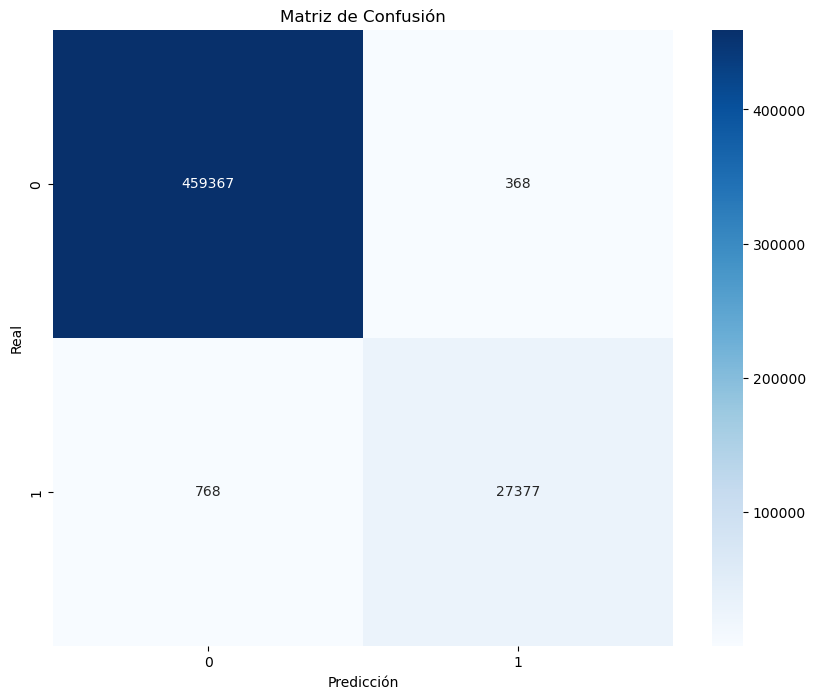


Métricas en conjunto de prueba:
ROC-AUC: 0.9995
Precision: 0.9867
Recall: 0.9727
F1-Score: 0.9797
Accuracy: 0.9977
Especificidad: 0.9992

Tiempo de ejecución: 1:16:00.994516


In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Iniciar el tiempo
start_time = datetime.now()

# Cargar los datos
df_mora_prestamos = pd.read_csv('D:/Tesis/Definitivos/nuevo/df_mora_prestamospersonales.csv')

# Separar features y target
X = df_mora_prestamos.drop('Morosidad', axis=1)
y = df_mora_prestamos['Morosidad']

# Split de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Crear y entrenar el modelo
gb_model = GradientBoostingClassifier(
   subsample=1.0,
   n_estimators=700,
   min_samples_split=5,
   min_samples_leaf=4,
   max_features='sqrt',
   max_depth=7,
   learning_rate=0.05,
   random_state=42,
   verbose=0
)

# Entrenar el modelo
gb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred = gb_model.predict(X_test)
y_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Calcular métricas
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
especificidad = tn / (tn + fp)

metrics = {
   'ROC-AUC': roc_auc_score(y_test, y_pred_proba),
   'Precision': precision_score(y_test, y_pred),
   'Recall': recall_score(y_test, y_pred),
   'F1-Score': f1_score(y_test, y_pred),
   'Accuracy': accuracy_score(y_test, y_pred),
   'Especificidad': especificidad
}

# Calcular tiempo de ejecución
end_time = datetime.now()
execution_time = end_time - start_time

# Visualización de la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Real')
plt.xlabel('Predicción')
plt.show()

# Imprimir métricas y tiempo de ejecución
print('\nMétricas en conjunto de prueba:')
for metric, value in metrics.items():
   print(f'{metric}: {value:.4f}')

print(f'\nTiempo de ejecución: {execution_time}')